In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#load dataset with electives
elective_df = pd.read_excel("data/tekems_section_demand_20230124_1930.xlsx")
print(elective_df.shape)
elective_df.head()

(2166, 36)


,lective,section_term,course,course_name,section,last_section_update,max_section_students,section_vacancies,demand_bidding_s1_g1_primary_list,demand_bidding_s1_g2_primary_list,...,allocations_bidding_s2_g1_alternative_list,allocations_bidding_s2_g2_alternative_list,allocations_wailist_t1,allocations_wailist_t2,allocations_wailist_t3,allocations_wailist_t4,cancellations_wailist_t1,cancellations_wailist_t2,cancellations_wailist_t3,cancellations_wailist_t4
0,201718,S1,2253,Corporate Finance,TA,2018-03-27 15:32:24,80,3,0,0,...,0,0,0,0,0,0,0,0,0,0
1,201718,S1,2174,Macroeconomic Analysis,TA,2018-01-15 08:42:43,70,8,0,0,...,0,0,0,0,0,0,0,0,0,0
2,201718,S1,2206,Banking,TA,2017-10-30 16:44:25,70,3,26,45,...,0,0,8,0,0,0,9,0,0,0
3,201718,S1,2827,Negotiation Strategy,TA,2017-09-12 17:44:06,48,3,54,0,...,0,0,3,0,0,0,5,0,0,0
4,201718,S1,2578,Mastering Your Career,TA,2018-01-15 08:54:29,650,48,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
elective_df.columns

Index(['lective', 'section_term', 'course', 'course_name', 'section',
       'last_section_update', 'max_section_students', 'section_vacancies',
       'demand_bidding_s1_g1_primary_list',
       'demand_bidding_s1_g2_primary_list',
       'demand_bidding_s2_g1_primary_list',
       'demand_bidding_s2_g2_primary_list',
       'demand_bidding_s1_g1_alternative_list',
       'demand_bidding_s1_g2_alternative_list',
       'demand_bidding_s2_g1_alternative_list',
       'demand_bidding_s2_g2_alternative_list', 'demand_wailist_t1',
       'demand_wailist_t2', 'demand_wailist_t3', 'demand_wailist_t4',
       'allocations_bidding_s1_g1_primary_list',
       'allocations_bidding_s1_g2_primary_list',
       'allocations_bidding_s2_g1_primary_list',
       'allocations_bidding_s2_g2_primary_list',
       'allocations_bidding_s1_g1_alternative_list',
       'allocations_bidding_s1_g2_alternative_list',
       'allocations_bidding_s2_g1_alternative_list',
       'allocations_bidding_s2_g2_alterna

In [6]:
elective_df["Demand_s1_g1_g2"] = elective_df["demand_bidding_s1_g1_primary_list"] +  elective_df['demand_bidding_s1_g2_primary_list']
elective_df["Demand_s2_g1_g2"] = elective_df["demand_bidding_s2_g1_primary_list"] +  elective_df['demand_bidding_s2_g2_primary_list']

In [7]:
elective_df = elective_df[['lective', 'section_term', 'course', 'course_name', 'section', "Demand_s1_g1_g2", "Demand_s2_g1_g2"]]

In [8]:
elective_df.head()

,lective,section_term,course,course_name,section,Demand_s1_g1_g2,Demand_s2_g1_g2
0,201718,S1,2253,Corporate Finance,TA,0,0
1,201718,S1,2174,Macroeconomic Analysis,TA,0,0
2,201718,S1,2206,Banking,TA,71,0
3,201718,S1,2827,Negotiation Strategy,TA,54,0
4,201718,S1,2578,Mastering Your Career,TA,0,0


In [9]:
df = pd.read_excel("data/Areas_of_courses_RC.xlsx")

In [10]:
df.head()

,Finance,HRM,Data Analytics,Business,Marketing,Economic policy,Economics,Entrepreneurship,Leadership,Operations,Service Management,Social Business,Strategy,Sustainability
0,Corporate Finance',Global Human Resources Management',Econometrics','Venture Simulation',Brand Management','Tools for Applied Policy Analysis: Cost Bene...,Macroeconomic Analysis','Creating and Managing Entrepreneurial Ventur...,'Wicked Global Leadership','Quality Management','Service Management','Management of Non-Profit Organizations','Negotiation Strategy','Environmental Policy'
1,'Financial Management','Human Resources Management','Introduction to Programming','Banking Supervision','Advanced Marketing','Policy Evaluation','Development Economics','Applied Entrepreneurship','Leadership Insights and Paradoxes','Global Supply Chain Management','Economics and Management of Tourism Systems','Business Models for Sustainability','Strategy in Global Markets','Global Energy Markets'
2,'Investments','Advanced Topics in Human Resources Management','Empirical Methods for Finance','Fintech Ventures','Marketing Management','Statistics for Policy Action','Nova Economics Special Project','Social Entrepreneurship','Macro for Managers','Project Management','Hospitality Operations','Social Impact Investment','Strategy Consulting','Metrics that Matter'
3,'Nova Students Portfolio','Corporate Social Responsibility','Financial Econometrics','International Taxation','Integrated Marketing Communications','Policy Appraisal','Microeconomic Analysis','Entrepreneurship','Management','Operations Management','Introduction to Hospitality Industry','Performance and Progress','Global Business Challenges','System Change'
4,'Applied Corporate Finance','Global Human Resources Management','Big Data Analysis','Fiscal Policy and Stabilization','Digital Marketing','Public Policy I','Macroeconometrics','Business Model Innovation','Mastering Your Career','Operations Strategy','Customer Experience and Service Excellence','Leading Social Enterprises with Impact in In...,'Advanced Strategy','CIRCULAR ECONOMY: Eliminate


In [11]:
df_melted = df.melt(var_name='category', value_name='course')

# Convert the 'course' column to lowercase, remove apostrophes, and strip leading/trailing spaces


# Clean

In [12]:
# Replace newlines with space, multiple spaces with single space, trim, and then replace space with comma
df_melted['course'] = (df_melted['course'].str.lower()
                                                   .str.replace("'", "", regex=False)
                                                   .str.replace("\n", " ", regex=False)
                                                   .str.replace("]", "")
                                                   .str.replace("[", "")
                                                   .str.replace("\s+", " ", regex=True)
                                                   .str.strip())

elective_df['course_name'] = (elective_df['course_name'].str.lower()
                                                           .str.replace("'", "", regex=False)
                                                           .str.replace("\n", " ", regex=False)
                                                           .str.replace("\s+", " ", regex=True)
                                                           .str.replace("]", " ")
                                                           .str.replace("[", " ") 
                                                           .str.strip())

In [13]:
elective_df.to_csv("data/elective_df.csv", index=False)
df_melted.to_csv("data/df_melted.csv", index=False)

# Join

In [14]:
# It seems the previous error was possibly due to a misinterpretation of float values in 'course_name' as strings.
# I will now ensure that all course names are strings and also provide a safeguard in the match_category function 
# to handle non-string inputs gracefully (although we've already converted everything to strings).
category_dict = pd.Series(df_melted.category.values, index=df_melted.course).to_dict()

# Updating the match_category function to handle non-string inputs and to ensure all keys and values are strings.
def match_category(course_name, category_dict):
    # Ensure course_name is a string
    course_name = str(course_name)
    for key, value in category_dict.items():
        # Ensure both key and value are strings for comparison
        key = str(key)
        if key in course_name:
            return value
    return None  # Return None if no partial match is found

# Reapplying the function to match categories after updating it
elective_df['category'] = elective_df['course_name'].apply(lambda x: match_category(x, category_dict))

In [15]:
not_matched = elective_df[elective_df['category'].isna()]

In [16]:
not_matched["course_name"].unique()

array(['creating and managing entrepreneurial ventures (starters academy)',
       'policy analysis exercise', 'entrepreneurial project design',
       'qualitative methods for business decision',
       'applied quantitative studies', 'smarter cities lab',
       'digital experimentation'], dtype=object)

# Plot

In [17]:
elective_df.head()

,lective,section_term,course,course_name,section,Demand_s1_g1_g2,Demand_s2_g1_g2,category
0,201718,S1,2253,corporate finance,TA,0,0,Finance
1,201718,S1,2174,macroeconomic analysis,TA,0,0,Economics
2,201718,S1,2206,banking,TA,71,0,Finance
3,201718,S1,2827,negotiation strategy,TA,54,0,Strategy
4,201718,S1,2578,mastering your career,TA,0,0,Leadership


In [18]:
# Define a mapping of old values to new values
rename_map = {
    'T1': 'S1',
    'T2': 'S1',
    'T3': 'S2',
    'T4': 'S2'
}

# Use the replace function to make the substitutions
elective_df['section_term'] = elective_df['section_term'].replace(rename_map)

In [33]:
# Group by 'Category', 'Year', and 'Semester', then sum the 'Demand'
grouped = elective_df.groupby(['category', 'lective', "section_term"])[['Demand_s1_g1_g2', "Demand_s2_g1_g2"]].sum().reset_index()

# Now we need to create a multi-index for plotting by setting 'Year' and 'Semester' as the index
grouped.set_index(['lective', 'section_term'], inplace=True)
grouped["Demand"] = grouped["Demand_s1_g1_g2"] + grouped["Demand_s2_g1_g2"]
grouped = grouped.drop(columns=["Demand_s1_g1_g2", "Demand_s2_g1_g2"])

# Unstack 'Category' to create columns for each category, this will help in plotting lines for each category
unstacked = grouped.pivot_table(index=['lective', 'section_term'], columns='category', values="Demand")

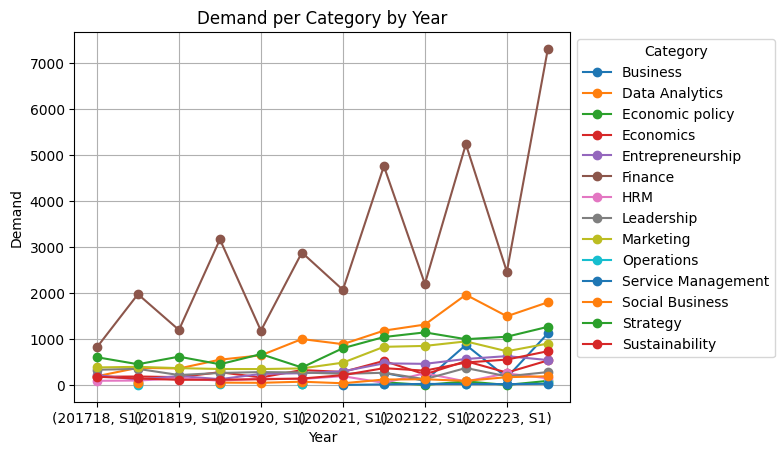

In [35]:
unstacked.plot(kind='line', marker='o')  # Transpose for proper plotting
plt.title('Demand per Category by Year')
plt.xlabel('Year')
plt.ylabel('Demand')
plt.grid(True)

# Adjust the legend position
plt.legend(title='Category', loc='upper left', bbox_to_anchor=(1,1))

# Show plot
plt.show()

In [20]:
elective_df.head()

,lective,section_term,course,course_name,section,Demand_s1_g1_g2,Demand_s2_g1_g2,category
0,201718,S1,2253,corporate finance,TA,0,0,Finance
1,201718,S1,2174,macroeconomic analysis,TA,0,0,Economics
2,201718,S1,2206,banking,TA,71,0,Finance
3,201718,S1,2827,negotiation strategy,TA,54,0,Strategy
4,201718,S1,2578,mastering your career,TA,0,0,Leadership


<Figure size 2500x600 with 0 Axes>

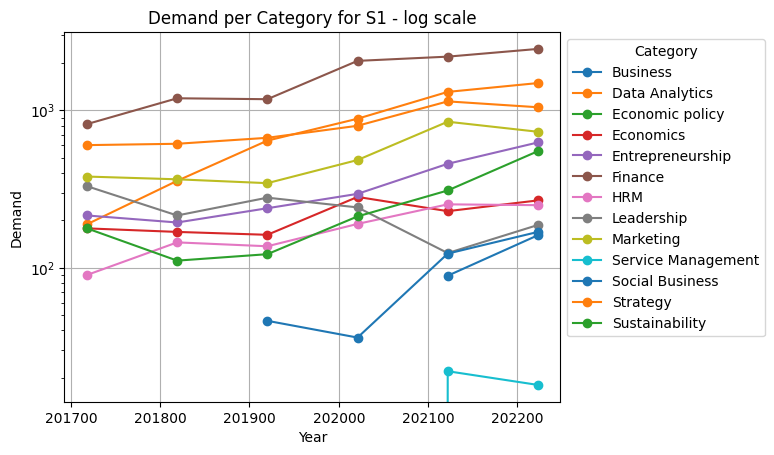

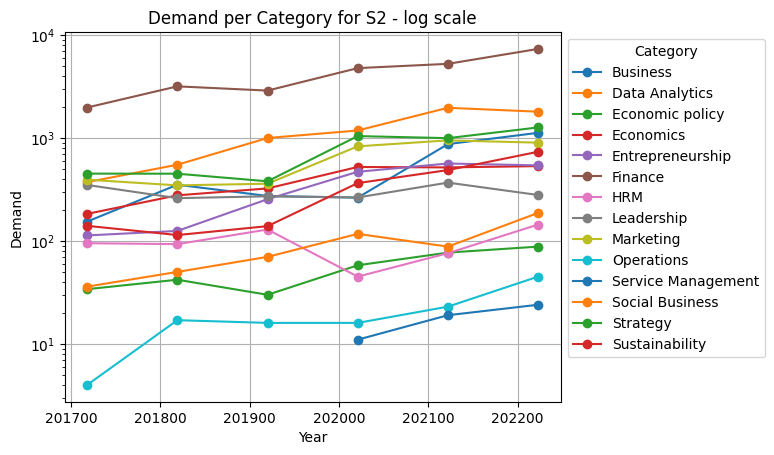

In [27]:
import matplotlib.pyplot as plt

semesters = ["Demand_s1_g1_g2", "Demand_s2_g1_g2"]
terms = ["S1", "S2"]

plt.figure(figsize=(25, 6))  # 12 inches wide and 6 inches tall

# Your existing code to group data and create a plot
for i in range(2):
    elective_df_term = elective_df[elective_df["section_term"]==terms[i]] 
    demand_per_category_year = elective_df_term.groupby(['category', 'lective'])[semesters[i]].sum().unstack()
    demand_per_category_year.T.plot(kind='line', marker='o')  # Transpose for proper plotting
    plt.yscale('log')  # Set the y-axis to a logarithmic scale
    plt.title('Demand per Category for '+ terms[i] + ' - log scale')
    plt.xlabel('Year')
    plt.ylabel('Demand')
    plt.grid(True)

    # Adjust the legend position
    plt.legend(title='Category', loc='upper left', bbox_to_anchor=(1,1))

    # Show plot
    plt.show()